In [18]:
from sklearn.datasets import make_classification
import numpy as np

X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=30)

In [19]:
import matplotlib.pyplot as plt

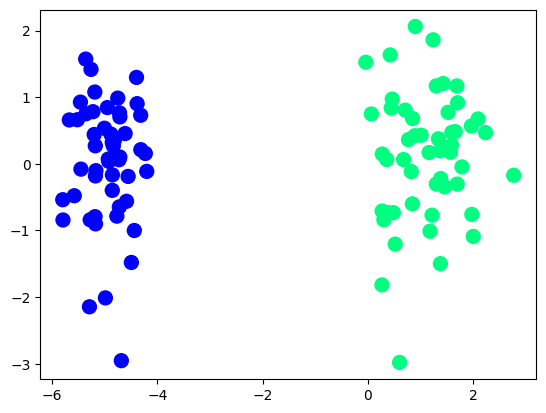

In [20]:
plt.scatter(X[0:,0],X[0:,1],c=y,cmap='winter',s=100)

In [21]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(10000):
        index = np.random.randint(0,X.shape[0])
        y_hat = np.dot(X[index],weights)
        if y_hat > 1:
            result = 1
        else:
            result=0
        weights = weights + lr*(y[index]-result) * X[index]
    return weights[0],weights[1:],weights

In [22]:
intercept_,coef_,weights = perceptron(X,y)
print(intercept_)
print(coef_)
print(weights)

1.4000000000000004
[1.16523655 0.21816584]
[1.4        1.16523655 0.21816584]


In [23]:
m = -(weights[1]/weights[2])
b = -(weights[0]/weights[2])

In [24]:
m

-5.341058589946769

In [25]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

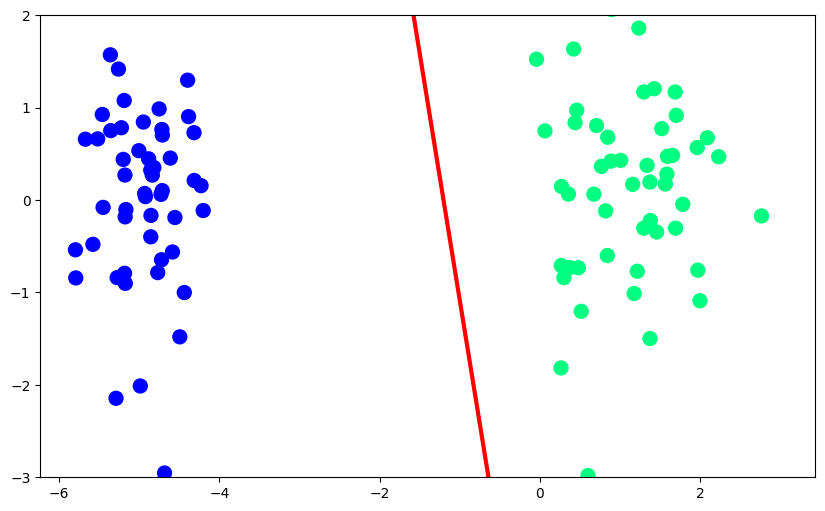

In [26]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [27]:
def step(z):
    return 1 if z>0 else 0

def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [28]:
m,b = perceptron(X,y)

<IPython.core.display.Javascript object>


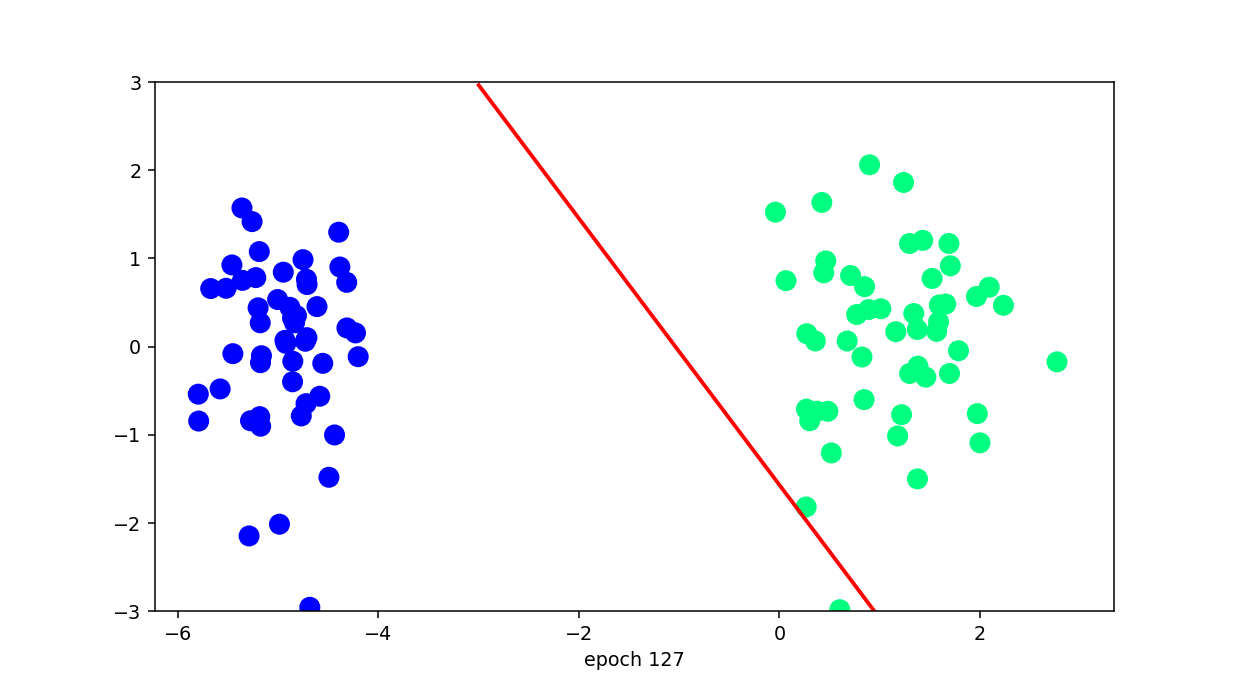

In [29]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [30]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [31]:
lor.coef_

array([[1.77298737, 0.0122258 ]])

In [32]:
lor.intercept_

array([3.54861952])

In [33]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_[0]/lor.coef_[0][0])

In [34]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

<IPython.core.display.Javascript object>


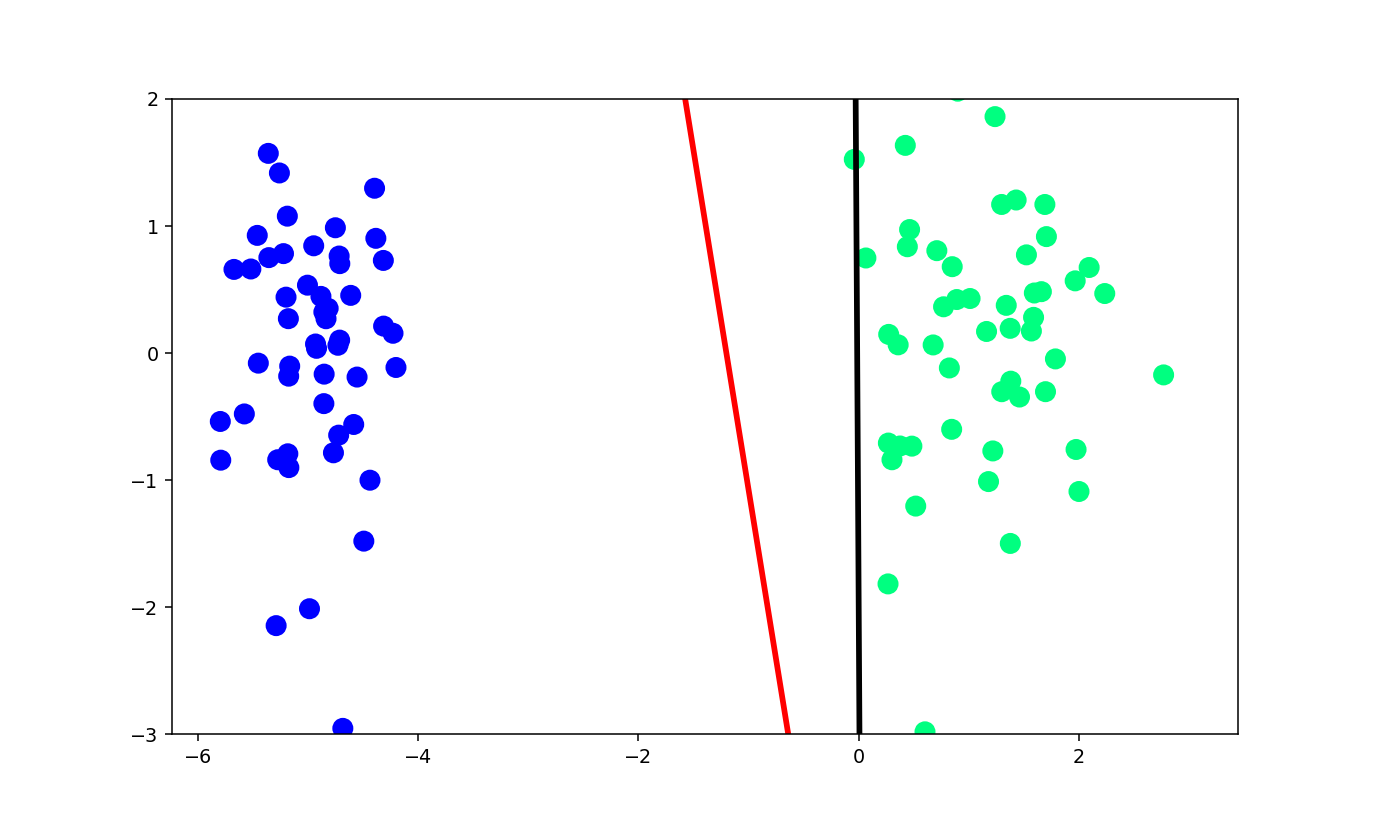

(-3.0, 2.0)

In [35]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)